In [3]:
#30/5/24 For the implementaion of RF Prediction in Python for Toxicity Prediction

import pandas as pd
import numpy as np
#Data import
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/Targetdata/DrugTargets.csv')
#Creating test/train splits
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=82)
#Converts Toxicity Values to a list
temp = trainset['Toxicity_Value']#.to_list
ytrain = []
for val in temp:
    ytrain.append(val)
ytest = []
temp = testset['Toxicity_Value']#.to_list
for val in temp:
    ytest.append(val)
#Converts encoded drug target values to an array
xtrain = trainset.iloc[:, 2:]
xtest = testset.iloc[:, 2:]

In [5]:
from sklearn.ensemble import RandomForestClassifier

mtry = 50

rf = RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=None,
                                            min_samples_split=8, min_samples_leaf=1, 
                                            min_weight_fraction_leaf=0.0, max_features=3, 
                                            max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                            bootstrap=True, oob_score=False, n_jobs= 4, random_state=81, 
                                            verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
                                            max_samples=None)

model= rf.fit(xtrain, ytrain)
preds = model.predict(xtest)


In [ ]:
#Metric curve creation (Recycled from autoencoder doc)
#Mostly to get a feel for how each metric impacts the tree
#Prototype for the creation of a hyperparameter finder that loops through each combination of variables

mtry = range(1, 30)
crite = ['gini', 'entropy', 'log_loss']
maxdepth = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
minsampsplit = range(2, 10)
minsampleaf = range(1, 10)
minleafweightfrac = np.arange(0, 0.5, 0.02)
maxfeat = ['sqrt', 'log2', None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
minpuritydec = np.arange(0, 2, 0.2)
maxsamp = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#Sets active varible
activevar = 
#A list of lists of metrics, the index corresponds to the active variable's index
resultlist = []
maxval = 0
bestmtry = 0
for var in activevar:
    metriclist = []
    for mtry in range(1, 30):
        rf = RandomForestClassifier(n_estimators=mtry, criterion='entropy', max_depth=None, 
                                min_samples_split=9, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=9, 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=81, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
                                max_samples=None)

        model= rf.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        newval = metriccalc(preds, ytest)
        
        metriclist.append(newval)
        
        if newval > maxval:
            maxval = newval
            bestmtry = mtry
            bestmetric = var
        
    resultlist.append(metriclist)

print('mcc peak of', maxval, 'at mtry =', bestmtry, 'with variable =', bestmetric)

loops = 0
for list in resultlist:
    plt.plot(list, label = activevar[loops])
    loops = loops + 1

plt.xlabel('mtry')
plt.ylabel('mcc')
plt.legend()
plt.show()

In [ ]:
model

optimal paramers at y= 0.02875841193569417 x= 27


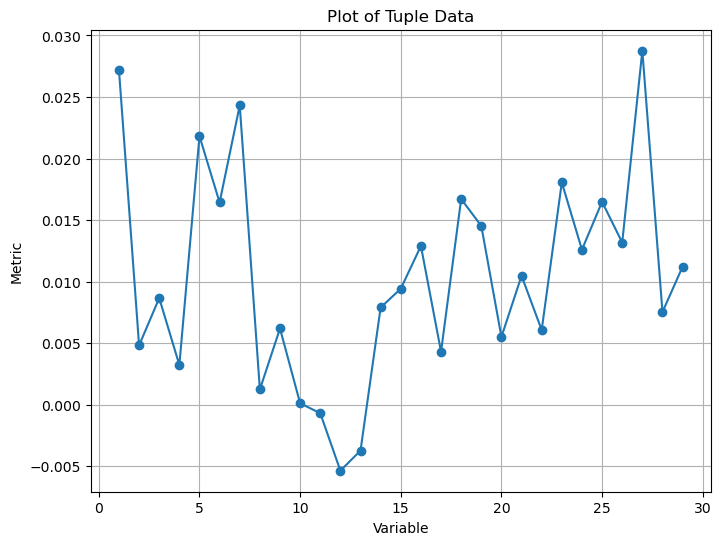

In [8]:
#Metric curve creation (Recycled from autoencoder doc)
metriclist = []
varlist = []

crite = ['gini', 'entropy', 'log_loss']
mtry = range(1, 30)
minsampleaf = range(1, 10)
maxfeat = ['sqrt', 'log2', None]

for mtry in range(1, 30):
    rf = RandomForestClassifier(n_estimators=mtry, criterion=crite[1], max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, max_features='sqrt', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            bootstrap=True, oob_score=False, n_jobs= 4, random_state=81, 
                            verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    
    model= rf.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    
    metriclist.append(metriccalc(preds, ytest))
    varlist.append(mtry)

import matplotlib.pyplot as plt
y_values = metriclist
x_values = varlist

max_y = max(y_values)
max_x = x_values[y_values.index(max_y)]

print('optimal paramers at y=', max_y, 'x=', max_x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Plot of Tuple Data')
plt.ylabel('Metric')
plt.xlabel('Variable')

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
#gargantuan for loop to test every combination of hyperparameters

mtry = range(1, 30)
crite = ['gini', 'entropy', 'log_loss']
maxdepth = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
minsampsplit = range(2, 10)
minsampleaf = range(1, 10)
minleafweightfrac = np.arange(0, 0.5, 0.02)
maxfeat = ['sqrt', 'log2', None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
minpuritydec = np.arange(0, 2, 0.2)
maxsamp = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#Sets active varible
activevar = 
#A list of lists of metrics, the index corresponds to the active variable's index
maxval = 0
bestmetrics = []

for mtry in range(1, 30):
    for criteria in crite:
        for depth in maxdepth:
            for sampsplit in minsampsplit:
                for sampleaf in minsampleaf:
                    for weight in minleafweightfrac:
                        for feat in maxfeat:
                            for puritydec in minpuritydec:
                                for samp in maxsamp:
                                    rf = RandomForestClassifier(n_estimators=mtry, criterion=criteria, max_depth=depth, 
                                                            min_samples_split=sampsplit, min_samples_leaf=sampleaf, 
                                                            min_weight_fraction_leaf=weight, max_features=feat, 
                                                            max_leaf_nodes=None, min_impurity_decrease=puritydec, 
                                                            bootstrap=True, oob_score=False, n_jobs= 4, random_state=81, 
                                                            verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
                                                            max_samples=samp)

                                    model= rf.fit(xtrain, ytrain)
                                    preds = model.predict(xtest)
                                    newval = metriccalc(preds, ytest)
                                    curmetrics = [mtry, criteria, depth, sampsplit, sampleaf, 
                                                  weight, feat, puritydec, samp]

                                    metriclist.append(newval)

                                    if newval > maxval:
                                        maxval = newval
                                        bestmetrics = curmetrics

print('best metrics = ', bestmetrics, 'for mcc of', maxval)

In [7]:
#function to calculate various metricsm, output changes as needed
import math
def metriccalc(preds, ytrain):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0

    iterations = 0
    for value in preds:
        testscore = ytrain[iterations]
        if value == 1:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        iterations = iterations + 1

    #netfn = fncount / (fncount + tncount)
    #nettn = tncount / (fncount + tncount)
    #netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    #posacc = tpcount / testpos
    #negacc = tncount / testneg
    #netfp = fpcount / (fpcount + tpcount)
    #nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    return mcc



In [ ]:
correctcount = 0
fpcount = 0
tpcount = 0
tncount = 0
fncount = 0
testpos = 0
testneg = 0

iterations = 0
for value in preds:
    testscore = ytest[iterations]
    if value == 1:
        if testscore != 0:
            testpos = testpos + 1
            correctcount = correctcount + 1
            tpcount = tpcount + 1
        else:
            fpcount = fpcount + 1
            testneg = testneg + 1
    else:
        if testscore != 0:
            testpos = testpos + 1
            fncount = fncount + 1
        else:
            testneg = testneg + 1
            correctcount = correctcount + 1
            tncount = tncount + 1

    iterations = iterations + 1

print('mtry =', mtry, '\n')

print('positives in data', testpos)
print('negatives in data', testneg, '\n')

print('fn count =', fncount)
print('tn count =', tncount)

print('tp count =', tpcount)
print('fp count =', fpcount, '\n')

netfn = fncount / (fncount + tncount)
nettn = tncount / (fncount + tncount)
netacc = correctcount / (fpcount + fncount + tpcount + tncount)
posacc = tpcount / testpos
negacc = tncount / testneg
netfp = fpcount / (fpcount + tpcount)
nettp = tpcount / (tpcount + fpcount)

print('net accuracy =', netacc)
print('positive accuracy =', posacc)
print('negative accuracy =', negacc, '\n')

fpr = fpcount / (fpcount + tncount)
tpr = tpcount / (tpcount + fncount)

print('fpr =', fpr)
print('tpr =', tpr, '\n')

f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)
print('f1 score =',f1)

tp = tpcount
fp = fpcount
tn = tncount
fn = fncount

mcc = ((tp * tn) - (fp * fn)) / math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))

print('mcc =',mcc)

temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp

print('cohen Kappa =',kapp)